# Logistic Regression for Classification
## Churn Prediction

**Objective: Identify clients that want to leave the company**

* Data: https://www.kaggle.com/blastchar/telco-customer-churn
* Target: 1, for people who leave, 0 for people who stay
* Use Logistic Regression for chain predection

## Setup

In [107]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt

## Read Data and initial Preparation
* Look at the data
* Make column names and values uniform
* Check if all columns read correctly
* Check if "churn" column needs preparation

In [2]:
df = pd.read_csv("../data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

**Alternative to download the Data**
```
data = https://www.kaggle.com/blastchar/telco-customer-churn
!wget $data -O ../data/MA_Fn-UseC_-Telco-Customer-Churn.csv"
```

In [3]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

* The dataframe is relatively large, we can not see all variables using .head()

In [4]:
# Transpose dataframe to see all columns
df.head().T

0             1               2  \
customerID              7590-VHVEG    5575-GNVDE      3668-QPYBK   
gender                      Female          Male            Male   
SeniorCitizen                    0             0               0   
Partner                        Yes            No              No   
Dependents                      No            No              No   
tenure                           1            34               2   
PhoneService                    No           Yes             Yes   
MultipleLines     No phone service            No              No   
InternetService                DSL           DSL             DSL   
OnlineSecurity                  No           Yes             Yes   
OnlineBackup                   Yes            No             Yes   
DeviceProtection                No           Yes              No   
TechSupport                     No            No              No   
StreamingTV                     No            No              No   
StreamingMovies                 No            No              No   
Contract            Month-to-month      One year  Month-to-month   
PaperlessBilling               Yes            No             Yes   
PaymentMethod     Electronic check  Mailed check    Mailed check   
MonthlyCharges               29.85         56.95           53.85   
TotalCharges                 29.85        1889.5          108.15   
Churn                           No            No             Yes   

                                          3                 4  
customerID                       7795-CFOCW        9237-HQITU  
gender                                 Male            Female  
SeniorCitizen                             0                 0  
Partner                                  No                No  
Dependents                               No                No  
tenure                                   45                 2  
PhoneService                             No               Yes  
MultipleLines              No phone service                No  
InternetService                         DSL       Fiber optic  
OnlineSecurity                          Yes                No  
OnlineBackup                             No                No  
DeviceProtection                        Yes                No  
TechSupport                             Yes                No  
StreamingTV                              No                No  
StreamingMovies                          No                No  
Contract                           One year    Month-to-month  
PaperlessBilling                         No               Yes  
PaymentMethod     Bank transfer (automatic)  Electronic check  
MonthlyCharges                         42.3              70.7  
TotalCharges                        1840.75            151.65  
Churn                                    No               Yes

In [5]:
# Make columns consistent
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [6]:
categorical_columns = list(df.dtypes[df.dtypes == object].index)
categorical_columns

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(" ", "_")

In [7]:
df.head().T

0             1               2  \
customerid              7590-vhveg    5575-gnvde      3668-qpybk   
gender                      female          male            male   
seniorcitizen                    0             0               0   
partner                        yes            no              no   
dependents                      no            no              no   
tenure                           1            34               2   
phoneservice                    no           yes             yes   
multiplelines     no_phone_service            no              no   
internetservice                dsl           dsl             dsl   
onlinesecurity                  no           yes             yes   
onlinebackup                   yes            no             yes   
deviceprotection                no           yes              no   
techsupport                     no            no              no   
streamingtv                     no            no              no   
streamingmovies                 no            no              no   
contract            month-to-month      one_year  month-to-month   
paperlessbilling               yes            no             yes   
paymentmethod     electronic_check  mailed_check    mailed_check   
monthlycharges               29.85         56.95           53.85   
totalcharges                 29.85        1889.5          108.15   
churn                           no            no             yes   

                                          3                 4  
customerid                       7795-cfocw        9237-hqitu  
gender                                 male            female  
seniorcitizen                             0                 0  
partner                                  no                no  
dependents                               no                no  
tenure                                   45                 2  
phoneservice                             no               yes  
multiplelines              no_phone_service                no  
internetservice                         dsl       fiber_optic  
onlinesecurity                          yes                no  
onlinebackup                             no                no  
deviceprotection                        yes                no  
techsupport                             yes                no  
streamingtv                              no                no  
streamingmovies                          no                no  
contract                           one_year    month-to-month  
paperlessbilling                         no               yes  
paymentmethod     bank_transfer_(automatic)  electronic_check  
monthlycharges                         42.3              70.7  
totalcharges                        1840.75            151.65  
churn                                    no               yes

* Have a look at the datatypes

In [8]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

**Notes**
* "seniorcitizen is int
* "totalcharges" is an object - should be a number

In [9]:
df.totalcharges

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: totalcharges, Length: 7043, dtype: object

In [10]:
# convert it to a number
pd.to_numeric(df["totalcharges"])

ValueError: Unable to parse string "_" at position 488

**Notes**
* This error occurs, because "_" are in the data and pandas does not know how to convert this into a number
* This happened, because we replaced all " " with "_"
* We can use ```errors="coerce"``` in ```to_numeric```, then everything that can not b converted, will be converted to NaN

In [11]:
# convert it to a number
tc = pd.to_numeric(df["totalcharges"], errors="coerce")
tc

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: totalcharges, Length: 7043, dtype: float64

In [12]:
tc.isnull().sum()

11

In [13]:
df["totalcharges"] = tc

* Replace missing values with 0

In [14]:
df["totalcharges"] = df["totalcharges"].fillna(0)

* Look at the "churn" variable

In [15]:
df["churn"].head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

* Replace yes / no with 1 / 0

In [16]:
df["churn"] = (df["churn"] == "yes").astype(int)
df["churn"].head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

## Setting up the Validation Framework
* Perform the train / vl /test split using scikit-learn

In [17]:
# 80% train + val = train_full, 20% test
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [18]:
print(f"train_full length {len(df_train_full)}, test length {len(df_test)}")

train_full length 5634, test length 1409


In [19]:
# 75% train, 25% val out of train_full 
# 60% train, 20% val, 20% test out of df
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)

In [20]:
print(f"train length {len(df_train)}, val length {len(df_val)}")

train length 4225, val length 1409


In [21]:
# reset index
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [22]:
y_train = df_train["churn"]
y_val = df_val["churn"]
y_test = df_test["churn"]

In [23]:
# delete "churn from df_train, df_val, df_test (not from df)
del df_train["churn"]
del df_val["churn"]
del df_test["churn"]

## EDA
* Check missing values
* Look at the target variable "churn"
* Look at numerical and categrical variables

In [24]:
# For the EDA we will df_train_full
df_train_full = df_train_full.reset_index(drop=True)

In [25]:
# check missing values
df_train_full.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

* No missing values

In [26]:
# look at the target variable
df_train_full["churn"].value_counts()

0    4113
1    1521
Name: churn, dtype: int64

In [27]:
# look at the target variable
df_train_full["churn"].value_counts(normalize=True)

0    0.730032
1    0.269968
Name: churn, dtype: float64

* Number of churned users is about 1/3 of the non-churned users
* "Churn rate" = 0.269968: Fraction of users that churned (~27%)

In [28]:
# churn rate can also be calculated using mean
df_train_full["churn"].mean()

0.26996805111821087

In [29]:
global_churn_rate = df_train_full["churn"].mean()
round(global_churn_rate, 2)

0.27

* Look at other Variables
* Numerical variables of interest: "tenure", "monthlycharges", "totalcharges"
* Categorical variables 

In [30]:
numerical = ["tenure", "monthlycharges", "totalcharges"]

In [31]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [32]:
df_train_full[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

**Notes**
* A lot of categorical variables are binary

## Feature Importance: Churn Rate and Risk Ratio
Feature importance analysis (part of EDA) - identify which features affect our target variable
* Churn rate
* Risk ratio
* Mutual information - later

**Churn Rate**
* Have a look at the churn rate in different groups

In [33]:
churn_female = df_train_full[df_train_full["gender"] == "female"].churn.mean()
churn_male = df_train_full[df_train_full["gender"] == "male"].churn.mean()
print(f"churn_female: {churn_female}, churn_male: {churn_male}")

churn_female: 0.27682403433476394, churn_male: 0.2632135306553911


In [34]:
churn_partner = df_train_full[df_train_full["partner"] == "yes"].churn.mean()
churn_no_partner = df_train_full[df_train_full["partner"] == "no"].churn.mean()
print(f"churn_partner: {churn_partner}, churn_no_partner: {churn_no_partner}")

churn_partner: 0.20503330866025166, churn_no_partner: 0.3298090040927694


**Difference**

global_churn_rate - churn_partner

In [35]:
global_churn_rate - churn_no_partner

-0.05984095297455855

* For customers living with a patner the churn rate is ~6% lower than the global churn rate
* For gender, the difference is low, it seems that the gender is not important
* "partner" seems to be more important than "gender" for predicting the churn rate
* Difference:
    * global_churn_rate - churn_group > 0 => less likely to churn
    * global_churn_rate - churn_group < 0 => more likely to churn

**Risk Ratio**

In [36]:
churn_no_partner / global_churn_rate

1.2216593879412643

In [37]:
churn_partner / global_churn_rate

0.7594724924338315

* For people without partner, the risk to churn is 22% higher than the mean
* For people with parther, the risk to churn is 24% lower than the mean

* Risk
    * churn_group / global_churn_rate > 1 => more likely to churn
    * churn_group / global_churn_rate > 1 => less likely to churn

* Both the difference and the risk ratio give the same information, but is a different way

In SQL this could look like this:

    ```
    SELECT gender,
         AVG(churn),
         AVG(churn) - global_churn AS diff,
         AVG(churn) / global_churn AS risk
    FROM 
        data
    GROUP BY 
        gender;
    ```
Translate this to pandas

In [38]:
# .agg is to get a dataframe instead of a series
df_group = df_train_full.groupby("gender").churn.agg(["mean", "count"])
df_group

mean  count
gender                 
female  0.276824   2796
male    0.263214   2838

In [39]:
df_group["diff"] = df_group["mean"] - global_churn_rate
df_group["risk"] = df_group["mean"] / global_churn_rate
df_group

mean  count      diff      risk
gender                                     
female  0.276824   2796  0.006856  1.025396
male    0.263214   2838 -0.006755  0.974980

* To this now for all categorical variables

In [40]:
for c in categorical:
    print(c)
    df_group = df_train_full.groupby(c).churn.agg(["mean", "count"])
    df_group["diff"] = df_group["mean"] - global_churn_rate
    df_group["risk"] = df_group["mean"] / global_churn_rate
    display(df_group)
    print()

gender


mean  count      diff      risk
gender                                     
female  0.276824   2796  0.006856  1.025396
male    0.263214   2838 -0.006755  0.974980


seniorcitizen


mean  count      diff      risk
seniorcitizen                                     
0              0.242270   4722 -0.027698  0.897403
1              0.413377    912  0.143409  1.531208


partner


mean  count      diff      risk
partner                                     
no       0.329809   2932  0.059841  1.221659
yes      0.205033   2702 -0.064935  0.759472


dependents


mean  count      diff      risk
dependents                                     
no          0.313760   3968  0.043792  1.162212
yes         0.165666   1666 -0.104302  0.613651


phoneservice


mean  count      diff      risk
phoneservice                                     
no            0.241316    547 -0.028652  0.893870
yes           0.273049   5087  0.003081  1.011412


multiplelines


mean  count      diff      risk
multiplelines                                        
no                0.257407   2700 -0.012561  0.953474
no_phone_service  0.241316    547 -0.028652  0.893870
yes               0.290742   2387  0.020773  1.076948


internetservice


mean  count      diff      risk
internetservice                                     
dsl              0.192347   1934 -0.077621  0.712482
fiber_optic      0.425171   2479  0.155203  1.574895
no               0.077805   1221 -0.192163  0.288201


onlinesecurity


mean  count      diff      risk
onlinesecurity                                          
no                   0.420921   2801  0.150953  1.559152
no_internet_service  0.077805   1221 -0.192163  0.288201
yes                  0.153226   1612 -0.116742  0.567570


onlinebackup


mean  count      diff      risk
onlinebackup                                            
no                   0.404323   2498  0.134355  1.497672
no_internet_service  0.077805   1221 -0.192163  0.288201
yes                  0.217232   1915 -0.052736  0.804660


deviceprotection


mean  count      diff      risk
deviceprotection                                        
no                   0.395875   2473  0.125907  1.466379
no_internet_service  0.077805   1221 -0.192163  0.288201
yes                  0.230412   1940 -0.039556  0.853480


techsupport


mean  count      diff      risk
techsupport                                             
no                   0.418914   2781  0.148946  1.551717
no_internet_service  0.077805   1221 -0.192163  0.288201
yes                  0.159926   1632 -0.110042  0.592390


streamingtv


mean  count      diff      risk
streamingtv                                             
no                   0.342832   2246  0.072864  1.269897
no_internet_service  0.077805   1221 -0.192163  0.288201
yes                  0.302723   2167  0.032755  1.121328


streamingmovies


mean  count      diff      risk
streamingmovies                                         
no                   0.338906   2213  0.068938  1.255358
no_internet_service  0.077805   1221 -0.192163  0.288201
yes                  0.307273   2200  0.037305  1.138182


contract


mean  count      diff      risk
contract                                           
month-to-month  0.431701   3104  0.161733  1.599082
one_year        0.120573   1186 -0.149395  0.446621
two_year        0.028274   1344 -0.241694  0.104730


paperlessbilling


mean  count      diff      risk
paperlessbilling                                     
no                0.172071   2313 -0.097897  0.637375
yes               0.338151   3321  0.068183  1.252560


paymentmethod


mean  count      diff      risk
paymentmethod                                                 
bank_transfer_(automatic)  0.168171   1219 -0.101797  0.622928
credit_card_(automatic)    0.164339   1217 -0.105630  0.608733
electronic_check           0.455890   1893  0.185922  1.688682
mailed_check               0.193870   1305 -0.076098  0.718121

## Feature Importance: Mutual Information
Mutual information - concept from information theory, it tells us how much we can learn about one variable  if we want to know the value of another

* https://en.wikipedia.org/wiki/Mutual_information

In [41]:
mutual_info_score(df_train_full["churn"], df_train_full["contract"])

0.0983203874041556

In [42]:
mutual_info_score(df_train_full["churn"], df_train_full["gender"])

0.0001174846211139946

In [43]:
mutual_info_score(df_train_full["churn"], df_train_full["partner"])

0.009967689095399745

* What is the relatve importance of the variables
* e.g. "contract" is more important than "gender"
* Do this for all categorical variables and order variables by importance

In [44]:
def mutual_info_churn_score(series):
    return mutual_info_score(df_train_full["churn"], series)

In [45]:
mi = df_train_full[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

## Feature Importance: Correlation
How about numerical columns
* Correlation Coefficient

In [46]:
df_train_full[numerical].corrwith(df_train_full["churn"])

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

* When "tenure" and "totalcharges" increase, churn rate decreases
* When "monthlycharges" increase, churn rate increases

In [47]:
df_train_full[df_train_full["tenure"] <= 2].churn.mean()

0.5953420669577875

In [48]:
df_train_full[(df_train_full["tenure"] > 2) & (df_train_full["tenure"] <= 12)].churn.mean()

0.3994413407821229

In [49]:
df_train_full[df_train_full["tenure"] > 12].churn.mean()

0.17634908339788277

* The higher "tenure", the lower the churn rate - negative correlation

In [50]:
df_train_full[df_train_full["monthlycharges"] <= 20].churn.mean()

0.08795411089866156

In [51]:
df_train_full[(df_train_full["monthlycharges"] > 20) & (df_train_full["monthlycharges"] <= 50)].churn.mean()

0.18340943683409436

In [52]:
df_train_full[df_train_full["monthlycharges"] > 50].churn.mean()

0.32499341585462205

* The higher "monthlycharges", the higher the churn rate - positive correlation

## One-Hot Encoding
* Use scikit learn to encode categorical features

In [91]:
# First convert to dictionary
train_dicts = df_train[categorical+numerical].to_dict(orient="records")

In [92]:
dv = DictVectorizer(sparse=False) # don't use sparse matrix
dv.fit(train_dicts)

DictVectorizer(sparse=False)

In [93]:
dv.get_feature_names()

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

In [94]:
X_train = dv.transform(train_dicts)

**Notes**
* If numerical values are passed in the dictionary they recognized and stay as they are, only categorical variables are one-hot encoded.
* Instead of first fit ```dv.fit(train_dicts)``` and then transform ```X_train = dv.transform(train_dicts)```, this can be done in one step ```X_train = dv.fit_transform(train_dicts)```
* Now to the same transformation (without fit!) for the validaion data

In [95]:
val_dicts = df_val[categorical+numerical].to_dict(orient="records")
X_val = dv.transform(val_dicts)

## Logistic Regression
* Binary Classification
* Linear vs Logistic Regression

```
y_i = g(x_i)
g(x_i) in [0,1] can be treated as propability of beloonging to the positive class
```

Linear Regression: ```g(x_i) = w_0 + W.T*x_i``` can be any real number

Logistic Regression: ```g(x_i) = sigmoid(w_0 + W.T*x_i)``` is between 0 and 1

In [96]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [101]:
# plot sigmoid
z = np.linspace(-7,7,71)
z

array([-7. , -6.8, -6.6, -6.4, -6.2, -6. , -5.8, -5.6, -5.4, -5.2, -5. ,
       -4.8, -4.6, -4.4, -4.2, -4. , -3.8, -3.6, -3.4, -3.2, -3. , -2.8,
       -2.6, -2.4, -2.2, -2. , -1.8, -1.6, -1.4, -1.2, -1. , -0.8, -0.6,
       -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,
        1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,
        4. ,  4.2,  4.4,  4.6,  4.8,  5. ,  5.2,  5.4,  5.6,  5.8,  6. ,
        6.2,  6.4,  6.6,  6.8,  7. ])

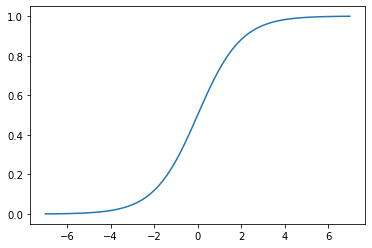

In [103]:
plt.plot(z, sigmoid(z));

In [104]:
def linear_regression(xi):
    result = w0
    
    for j in range(w):
        result = result + xi[j]*w[j]
    return result

In [105]:
def logistic_regression(xi):
    score = w0
    
    for j in range(w):
        score = score + xi[j]*w[j]
        
    result = sigmoid(score)
    return result

**Notes**
* Both logistig and linear regression are linear models
* Advantage of linear models: fast to train

## Training Logistic Regression with Scikit-Learn
* Train a Model with Scikit-Learn
* Apply it to the Validation Dataset
* Calculate the Accuracy

In [108]:
model = LogisticRegression()
model.fit(X_train, y_train)

/home/jens/miniconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

* Look at the intersection and coefficients (weights) 

In [113]:
model.intercept_[0]

-0.10903663724625358

In [111]:
model.coef_[0].round(3)

array([ 0.476, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.336,  0.317, -0.089,  0.004, -0.258,  0.142,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.123, -0.166,  0.059, -0.087, -0.032,  0.07 , -0.059,  0.142,
       -0.249,  0.216, -0.121, -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

* Apply the model

In [115]:
# hard predictions
model.predict(X_train)

array([0, 1, 1, ..., 1, 0, 1])

In [116]:
# soft predictions
model.predict_proba(X_train)

array([[0.90488245, 0.09511755],
       [0.3206462 , 0.6793538 ],
       [0.36627403, 0.63372597],
       ...,
       [0.46801735, 0.53198265],
       [0.95734485, 0.04265515],
       [0.30113298, 0.69886702]])

**Notes**
* Hard predictions, predict 0 or 1
* Soft predictions predict a propability
    * ```predict_proba``` gives an array with 2 columns
    * The first column is the propabilty of the negative class
    * The second column is the propabilty of the positive class
* We are only interested in the propabilities of the positive class

In [121]:
# soft predictions of churning
y_pred_train = model.predict_proba(X_train)[:,1]
y_pred = model.predict_proba(X_val)[:,1]

* With the soft predictions we can set a threshold (e.g. 0.5) to make a hard prediction
* We can then find the people that are likly to churn (and e.g. send a promotional e-mail / discount / ...)

In [124]:
churn_decision = (y_pred > 0.5)
churn_decision

array([False, False, False, ..., False,  True,  True])

In [127]:
df_val[churn_decision].customerid

3       8433-wxgna
8       3440-jpscl
11      2637-fkfsy
12      7228-omtpn
19      6711-fldfb
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 311, dtype: object

* Compute the accuracy of the model
* Compare y_val and churn_decision

In [132]:
df_pred = pd.DataFrame()
df_pred["probability"] = y_pred
df_pred["prediction"] = churn_decision.astype(int)
df_pred["actual"] = y_val
df_pred["correct"] = (df_pred.prediction == df_pred.actual)
df_pred

probability  prediction  actual  correct
0        0.009014           0       0     True
1        0.204703           0       0     True
2        0.212366           0       0     True
3        0.543003           1       1     True
4        0.213884           0       0     True
...           ...         ...     ...      ...
1404     0.314668           0       0     True
1405     0.039440           0       1    False
1406     0.136504           0       0     True
1407     0.799891           1       1     True
1408     0.837530           1       1     True

[1409 rows x 4 columns]

* We need the fraction of the correct values

In [133]:
df_pred.correct.mean()

0.8034066713981547

* This can also be calculated as

In [129]:
(y_val == churn_decision).mean()

0.8034066713981547

* The model in ~80% correct

## Model Interpretation
* Look at the Coefficients
* Train a smaller Model with fewer Features

## Using the Model

## Summary
* Feature importance - risk, mutual information, correlation
* One-hot encoding can be implemented with ```DictVectorizer```
* Logistic Regression - linear model like linear regression
* Output of logreg - propability
* Interpretation of weights is similar to linear regression

## Explore more